In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [4]:
df = pd.read_excel("ANZ synthesised transaction dataset.xlsx")
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [5]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df["gender1"] = lb_make.fit_transform(df["gender"])
df[["gender", "gender1"]]

,gender,gender1
0,F,0
1,F,0
2,M,1
3,F,0
4,F,0
5,M,1
6,F,0
7,F,0
8,F,0
9,M,1


In [6]:
df.shape

(12043, 24)

In [7]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df["txn_description1"] = lb_make.fit_transform(df["txn_description"])
df[["txn_description", "txn_description1"]]

,txn_description,txn_description1
0,POS,4
1,SALES-POS,5
2,POS,4
3,SALES-POS,5
4,SALES-POS,5
5,PAYMENT,2
6,SALES-POS,5
7,POS,4
8,POS,4
9,INTER BANK,0


In [8]:
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,gender1,txn_description1
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,0,4
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,0,5
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,1,4
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,0,5
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,0,5


In [9]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df["movement1"] = lb_make.fit_transform(df["movement"])
df[["movement", "movement1"]]

,movement,movement1
0,debit,1
1,debit,1
2,debit,1
3,debit,1
4,debit,1
5,debit,1
6,debit,1
7,debit,1
8,debit,1
9,debit,1


In [10]:
df.shape

(12043, 26)

In [11]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df["status1"] = lb_make.fit_transform(df["status"])
df[["status", "status1"]]

,status,status1
0,authorized,0
1,authorized,0
2,authorized,0
3,authorized,0
4,authorized,0
5,posted,1
6,authorized,0
7,authorized,0
8,authorized,0
9,posted,1


In [12]:
df.shape

(12043, 27)

In [13]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df["currency1"] = lb_make.fit_transform(df["currency"])
df[["currency", "currency1"]]

,currency,currency1
0,AUD,0
1,AUD,0
2,AUD,0
3,AUD,0
4,AUD,0
5,AUD,0
6,AUD,0
7,AUD,0
8,AUD,0
9,AUD,0


In [14]:
df.shape

(12043, 28)

In [15]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df["country1"] = lb_make.fit_transform(df["country"])
df[["country", "country1"]]

,country,country1
0,Australia,0
1,Australia,0
2,Australia,0
3,Australia,0
4,Australia,0
5,Australia,0
6,Australia,0
7,Australia,0
8,Australia,0
9,Australia,0


In [16]:
df.shape

(12043, 29)

In [17]:
df_salaries = df[df["txn_description"] == "PAY/SALARY"].groupby("customer_id").mean()

In [18]:
salaries = []
for customer_id in df["customer_id"]:
    salaries.append(int(df_salaries.loc[customer_id]["amount"]))
df["annual_salary"] = salaries

In [19]:
df_cus = df.groupby("customer_id").mean()
print("Mean annual salary by customer: ")
print(df_cus.head(), "\n")

Mean annual salary by customer: 
                card_present_flag  merchant_code       balance   age  \
customer_id                                                            
CUS-1005756958           0.812500            0.0   2275.852055  53.0   
CUS-1117979751           0.826923            0.0   9829.929000  21.0   
CUS-1140341822           0.815385            0.0   5699.212250  28.0   
CUS-1147642491           0.750000            0.0   9032.841186  34.0   
CUS-1196156254           0.785276            0.0  22272.433755  34.0   

                    amount  gender1  txn_description1  movement1   status1  \
customer_id                                                                  
CUS-1005756958  222.862603      0.0          3.479452   0.821918  0.342466   
CUS-1117979751  339.843700      1.0          3.210000   0.930000  0.480000   
CUS-1140341822  212.632500      1.0          3.800000   0.925000  0.187500   
CUS-1147642491  245.600169      0.0          3.466102   0.889831  0.3559

In [20]:
import matplotlib.pyplot as plt  
import seaborn as sns
corr = df_cus.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True)
plt.title('Data Correlation')
plt.show()

<Figure size 640x480 with 2 Axes>

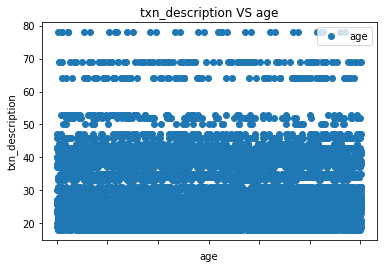

In [21]:
df.plot(x='txn_description', y='age', style='o')  
plt.title('txn_description VS age')  
plt.ylabel('txn_description')  
plt.xlabel('age')  
plt.show()

In [22]:
X = df_cus.drop(['annual_salary','card_present_flag', 'merchant_code'],axis=1)
y = df_cus["annual_salary"].values

In [23]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [24]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

-14180.417849038618
[ 1.78848670e-04  4.94991095e+00  7.62786382e+00  1.65538855e+02
 -3.17015629e+02  1.74142611e+04 -4.89533853e+02  0.00000000e+00
  0.00000000e+00]


In [26]:
y_pred = regressor.predict(X_test)
print("Predictions using test data:")
print(regressor.predict(X_test), "\n")

Predictions using test data:
[3078.81890062 1576.14655399 2558.41411519 1971.74838085 2558.71651101
 2009.44636459 2601.34150818 3370.35929715 2608.8872599   -30.26513866
 3274.97835691 2521.08451339 2166.31755786 3563.63571018 2026.72871319
 2768.14260893 1605.01336993 1811.9453833  2033.35661594 1747.62907824] 



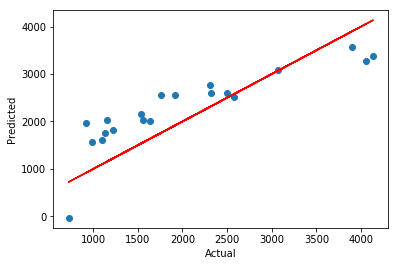

In [27]:
import matplotlib.pyplot as plt  
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test, color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [28]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Accuracy: ', (100-100*(metrics.mean_squared_error(y_test, y_pred))))

Mean Absolute Error: 533.8930091369573
Mean Squared Error: 358982.8302737413
Accuracy:  -35898183.027374126


In [29]:
df.head

<bound method NDFrame.head of            status  card_present_flag bpay_biller_code         account  \
0      authorized                1.0              NaN  ACC-1598451071   
1      authorized                0.0              NaN  ACC-1598451071   
2      authorized                1.0              NaN  ACC-1222300524   
3      authorized                1.0              NaN  ACC-1037050564   
4      authorized                1.0              NaN  ACC-1598451071   
5          posted                NaN              NaN  ACC-1608363396   
6      authorized                1.0              NaN  ACC-2776252858   
7      authorized                1.0              NaN  ACC-2776252858   
8      authorized                1.0              NaN   ACC-182446574   
9          posted                NaN              NaN   ACC-602667573   
10         posted                NaN              NaN  ACC-2171593283   
11         posted                NaN              NaN  ACC-2776252858   
12     authorized    

In [30]:
df_cus.head

<bound method NDFrame.head of                 card_present_flag  merchant_code        balance   age  \
customer_id                                                             
CUS-1005756958           0.812500            0.0    2275.852055  53.0   
CUS-1117979751           0.826923            0.0    9829.929000  21.0   
CUS-1140341822           0.815385            0.0    5699.212250  28.0   
CUS-1147642491           0.750000            0.0    9032.841186  34.0   
CUS-1196156254           0.785276            0.0   22272.433755  34.0   
CUS-1220154422           0.750000            0.0    8475.796000  25.0   
CUS-1233833708           0.760000            0.0    4923.853636  44.0   
CUS-1271030853           0.861538            0.0    5003.940513  30.0   
CUS-127297539            0.824675            0.0    5448.334573  20.0   
CUS-134193016            0.740741            0.0    5553.929474  21.0   
CUS-134833760            0.744186            0.0   10162.788961  52.0   
CUS-1388323263       

In [31]:
df_cus.columns

Index(['card_present_flag', 'merchant_code', 'balance', 'age', 'amount',
       'gender1', 'txn_description1', 'movement1', 'status1', 'currency1',
       'country1', 'annual_salary'],
      dtype='object')

In [32]:
df_cat = df[["txn_description", "gender", "age", "merchant_state", "movement"]]
# Changing all categories to dummies
pd.get_dummies(df_cat).head()

N_train = int(len(df)*0.8)
X_train = pd.get_dummies(df_cat).iloc[:N_train]
Y_train = df["annual_salary"].iloc[:N_train]
X_test = pd.get_dummies(df_cat).iloc[N_train:]
Y_test = df["annual_salary"].iloc[N_train:]

# Classification
print("DECISION TREE - CLASSIFIER:\n")
decision_tree_class = DecisionTreeClassifier()
decision_tree_class.fit(X_train, Y_train)
print(f"Decision Tree Classifier Training Score: {decision_tree_class.score(X_train, Y_train)}\n")

print("Predictions using test data:")
print(decision_tree_class.predict(X_test), "\n")

print(f"Decision Tree Classifier Testing Score: {decision_tree_class.score(X_test, Y_test)}\n")

# Regression
print("DECISION TREE - REGRESSOR:\n")
decision_tree_reg = DecisionTreeRegressor()
decision_tree_reg.fit(X_train, Y_train)
print(f"Decision Tree Regressor Training Score: {decision_tree_reg.score(X_train, Y_train)}\n")

print("Predictions using test data:")
print(decision_tree_reg.predict(X_test), "\n")

print(f"Decision Tree Regressor Testing Score: {decision_tree_reg.score(X_test, Y_test)}\n")

DECISION TREE - CLASSIFIER:

Decision Tree Classifier Training Score: 0.7882499481004774

Predictions using test data:
[1013 1043 4132 ... 4054 1043  996] 

Decision Tree Classifier Testing Score: 0.7546699875466999

DECISION TREE - REGRESSOR:

Decision Tree Regressor Training Score: 0.7468978726536879

Predictions using test data:
[1226.42857143 1043.         4132.         ... 3345.04761905 1043.
 1626.        ] 

Decision Tree Regressor Testing Score: 0.6805573819589598

